# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Adika Zahran
- **Email:** 	mc624d5y2108@student.devacademy.id
- **ID Dicoding:** MC624D5Y2108


## Menentukan Pertanyaan Bisnis

1. Bagaimana pola aktivitas per jam dalam hour.csv berbeda antara hari kerja dan akhir pekan, serta jam berapa saja yang merupakan puncak dan masa sepi dalam periode data terakhir?

2. "Bagaimana hubungan antar variabel dalam day.csv dan hour.csv, dan bagaimana korelasi tersebut dapat memberikan insight untuk perbaikan strategi bisnis?"

## Import Semua Packages/Library yang Digunakan

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [108]:
# Gathering Data (day.csv)
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [109]:
# Gathering Data (hour.csv)
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [110]:
# Assesing Data (day.csv)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**                                                                 
Ada perbedaan pada tipe data di "dteday" yang seharusnya menggunakan date yg tersedia yaitu Object (Harus Kita Ubah ke Date).


In [111]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**                                                               
Tidak ada data yang Missing (No Missing Values)

In [112]:
print('Duplikasi Data :', day_df.duplicated().sum())

Duplikasi Data : 0


**Insight:**
Tidak ada Duplikasi Data (No Duplicated Data)

In [113]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**                                                               
Tidak ada Keanehan/Kesalahan dari hasil Describe

In [114]:
# Assesing Data (hour.csv)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**                                                                 
Ada perbedaan pada tipe data di "dteday" yang seharusnya menggunakan date yg tersedia yaitu Object (Harus Kita Ubah ke Date).


In [115]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**                                                               
Tidak ada data yang Missing (No Missing Values)

In [116]:
print('Duplikasi Data :', hour_df.duplicated().sum())

Duplikasi Data : 0


**Insight:**
Tidak ada Duplikasi Data (No Duplicated Data)

In [117]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**                                                               
Tidak ada Keanehan/Kesalahan dari hasil Describe

### Cleaning Data

In [118]:
# Mengubah Tipe Data dteday (day.csv)
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [119]:
# Mengubah Tipe Data dteday (hour.csv)
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data dteday yang ada di day.csv sudah berubah ke datetime
- Tipe data dteday yang ada di hour.csv sudah berubah ke datetime

## Exploratory Data Analysis (EDA)

# --- EDA untuk day.csv ---

In [120]:
# Menampilkan info day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [121]:
# Cek nilai yang hilang
print("\nNilai yang hilang pada day.csv:")
print(day_df.isnull().sum())


Nilai yang hilang pada day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [122]:
# Melihat statistik ringkasan untuk memahami distribusi dan rentang nilai dalam day_df.
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


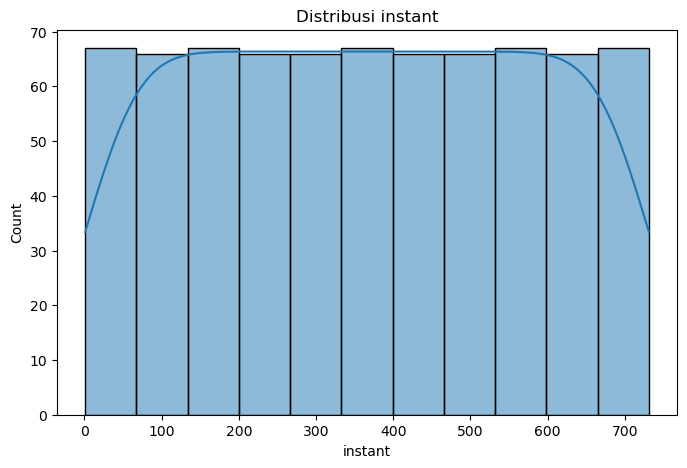

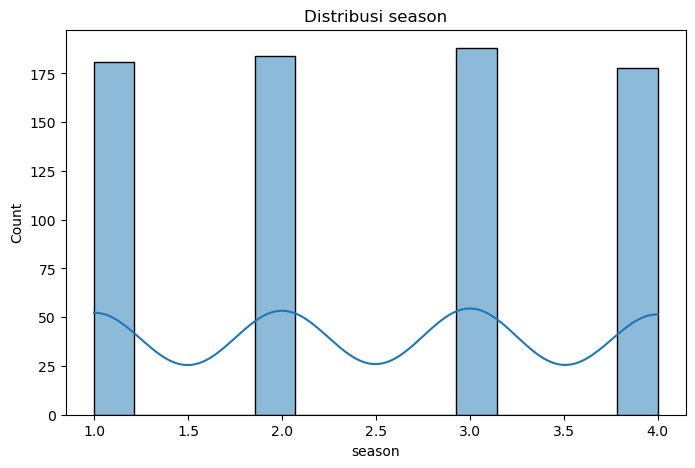

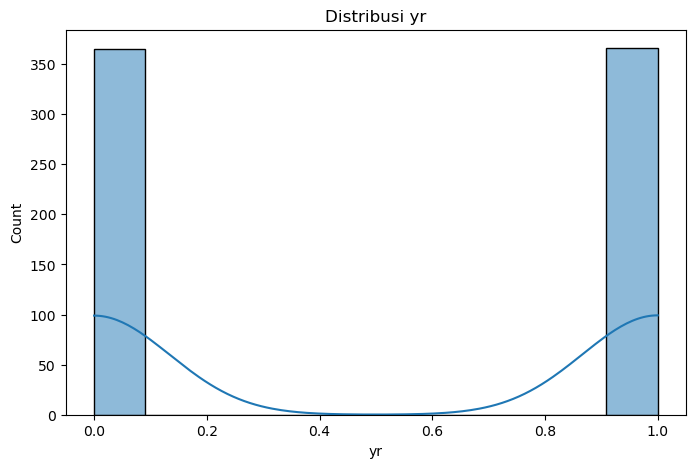

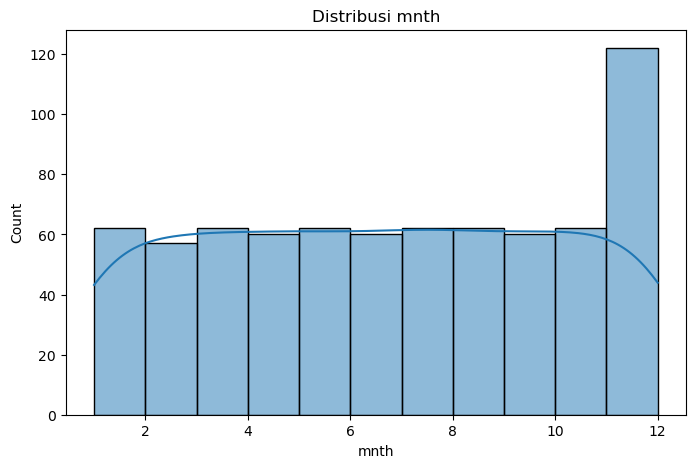

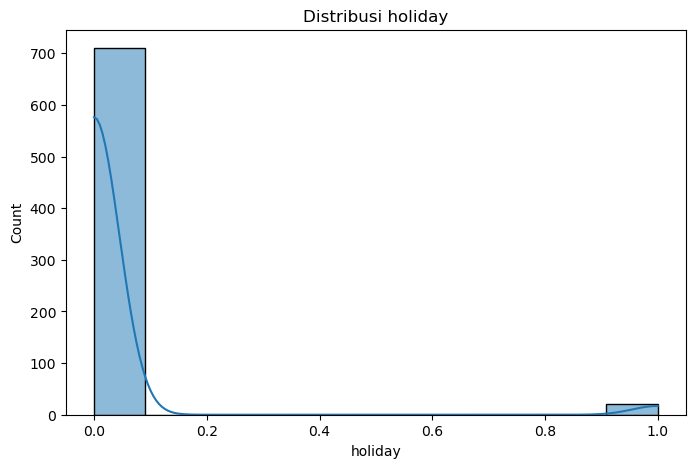

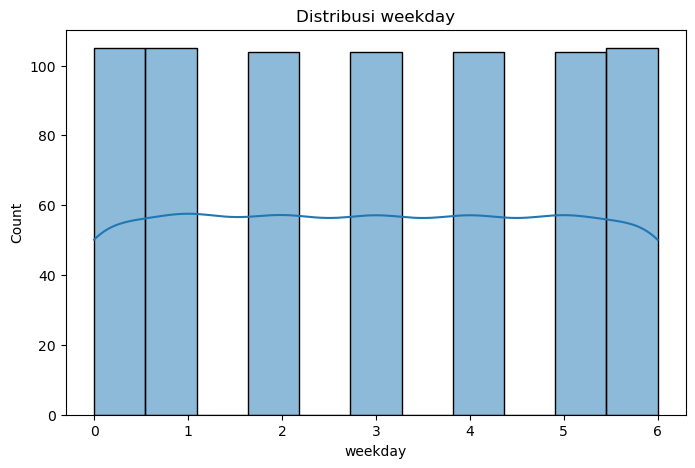

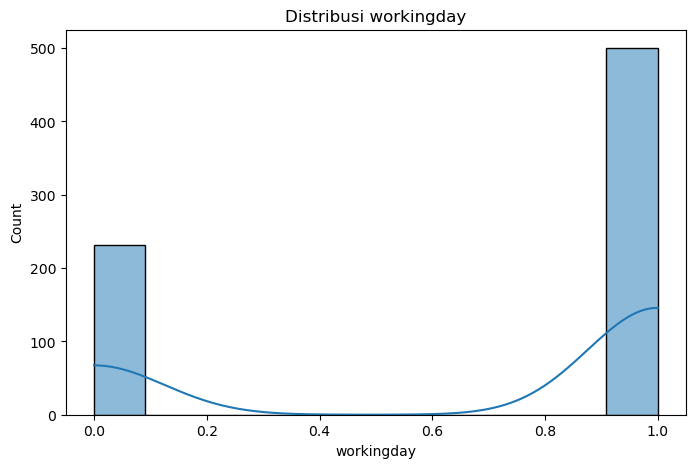

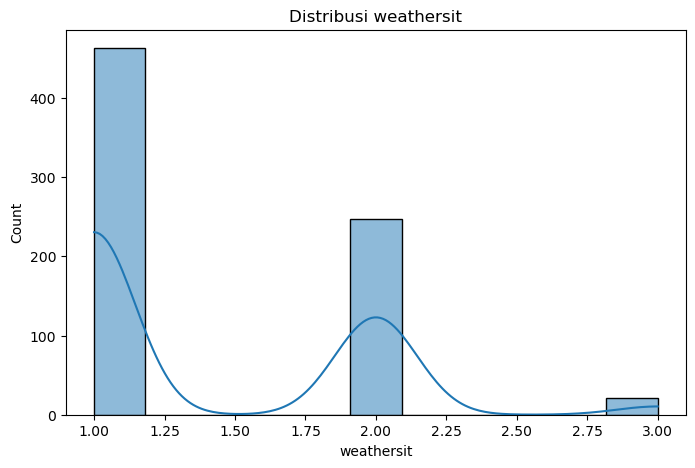

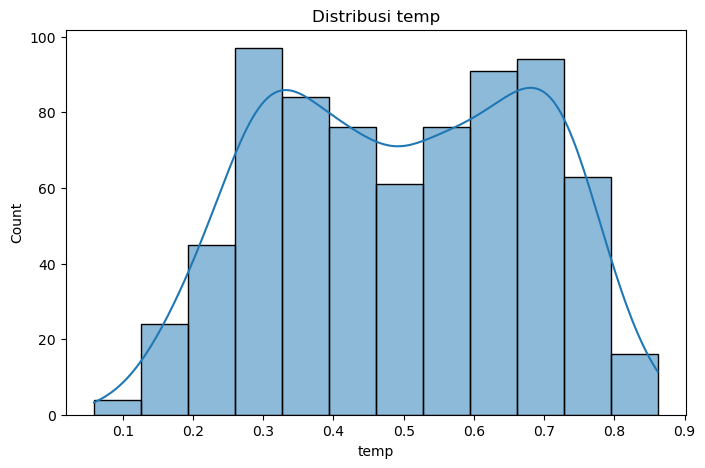

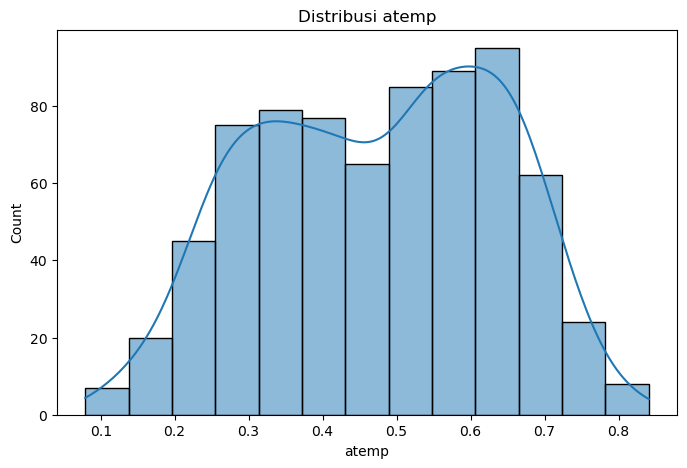

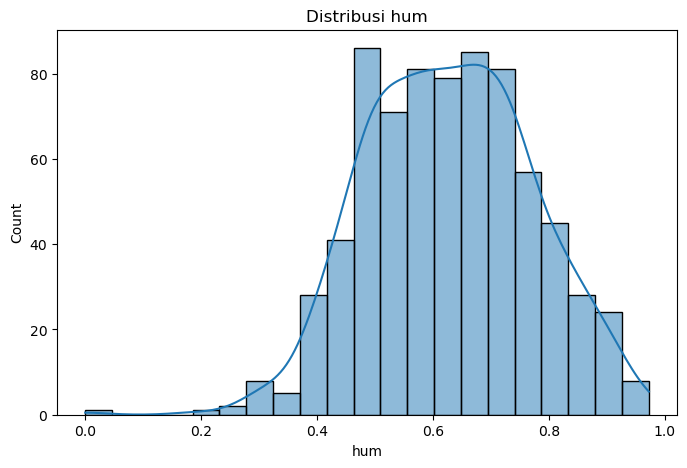

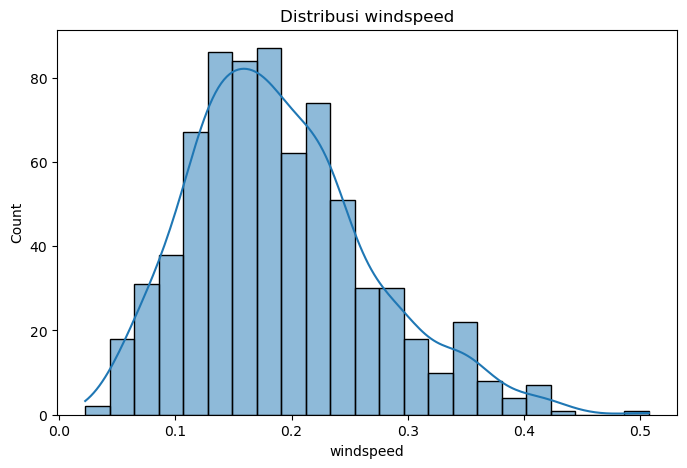

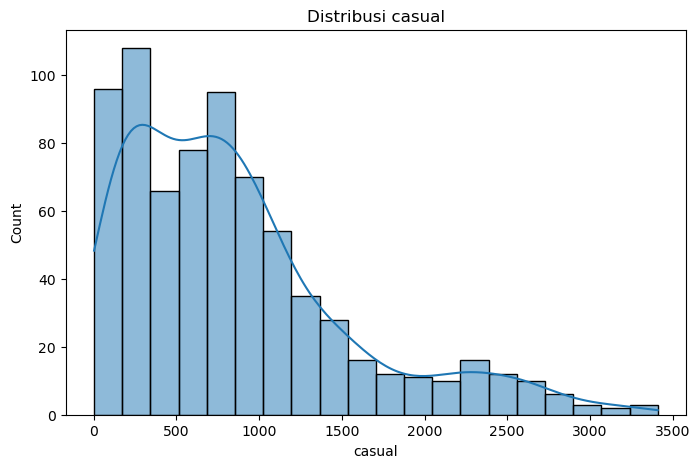

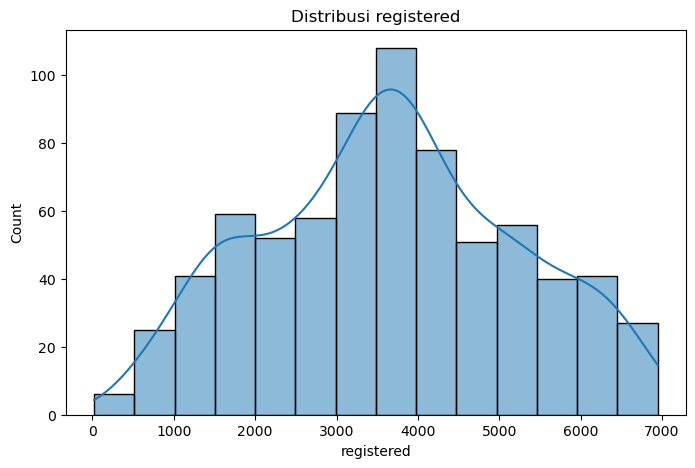

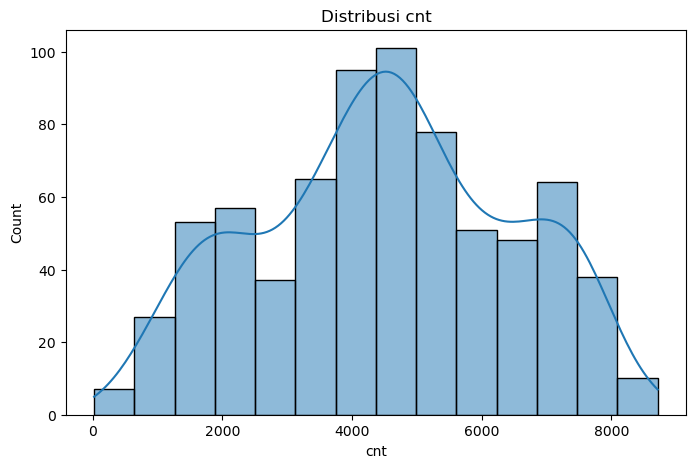

In [123]:
# Plot distribusi untuk melihat penyebaran data numerik
numerical_columns = day_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(day_df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

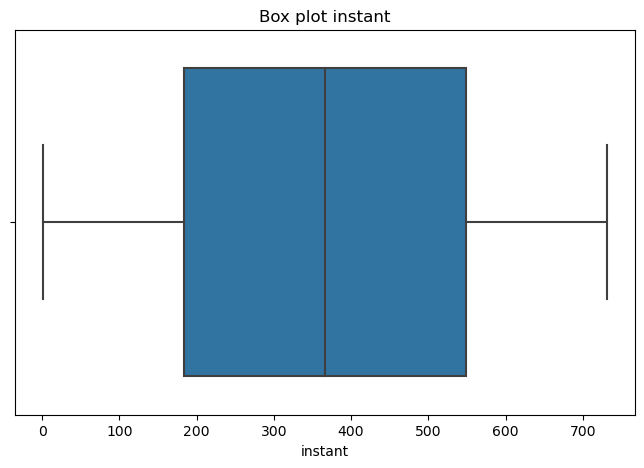

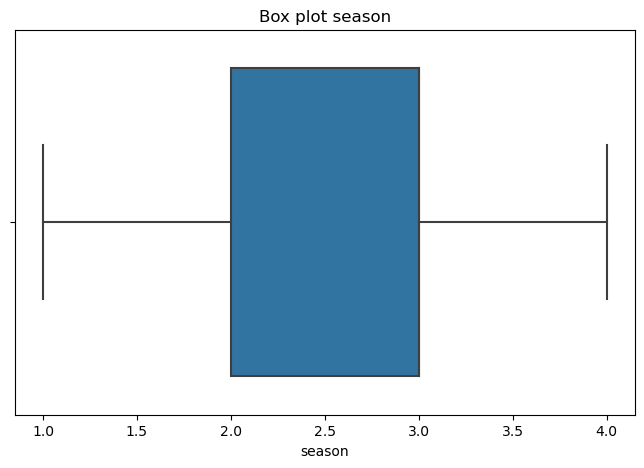

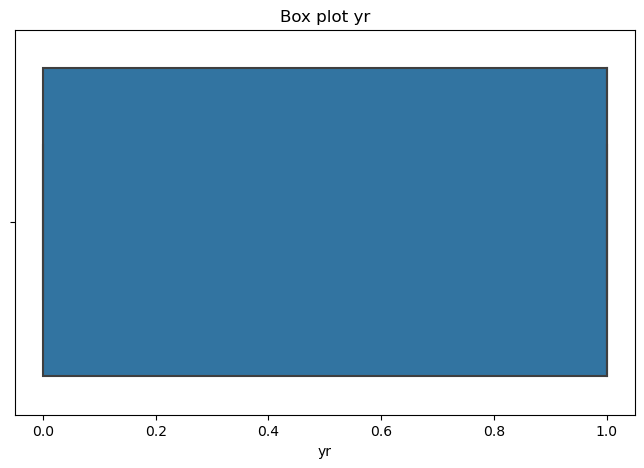

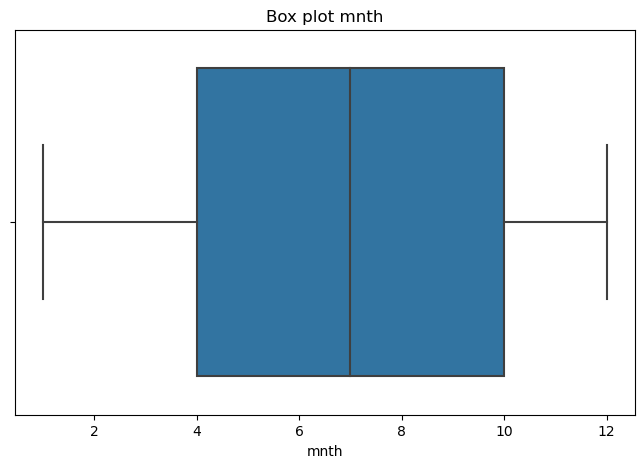

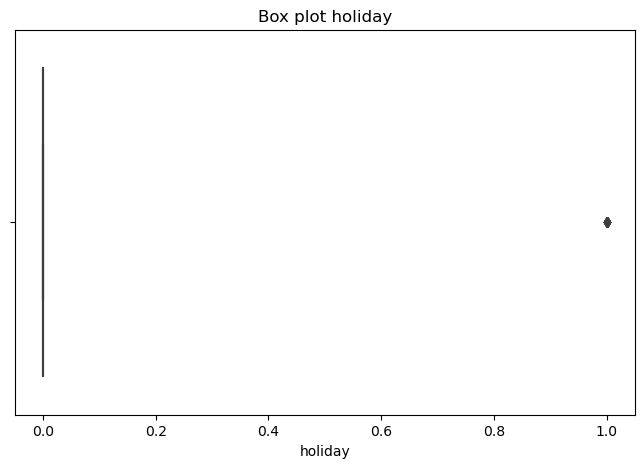

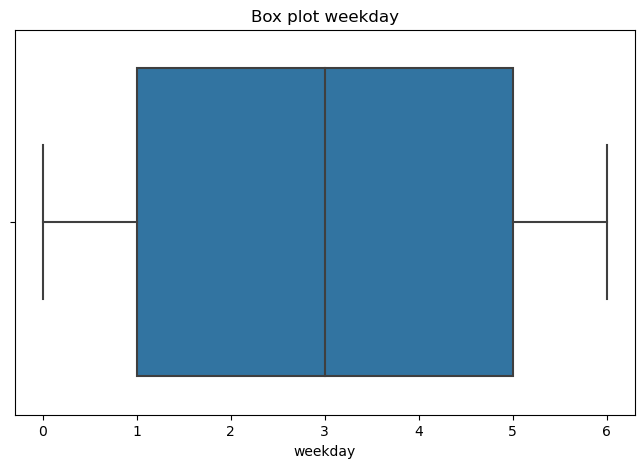

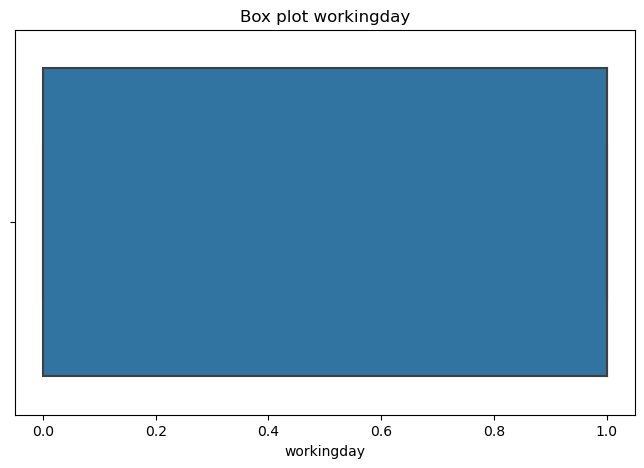

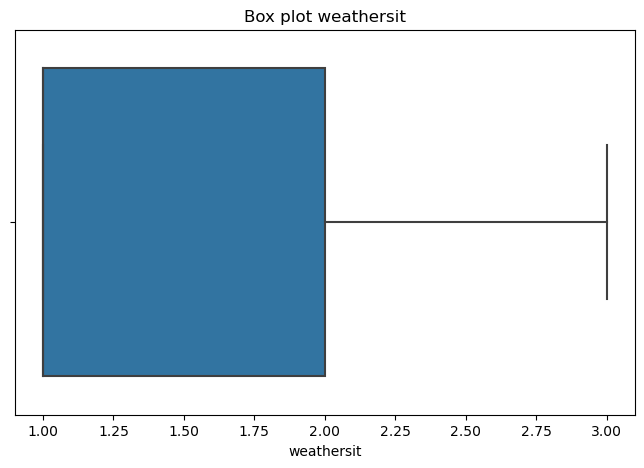

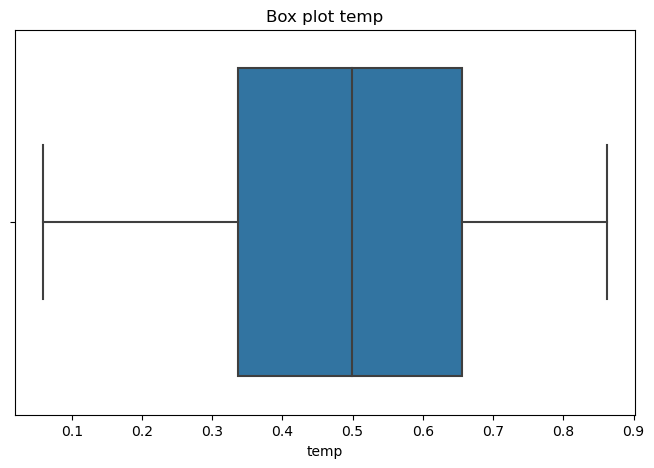

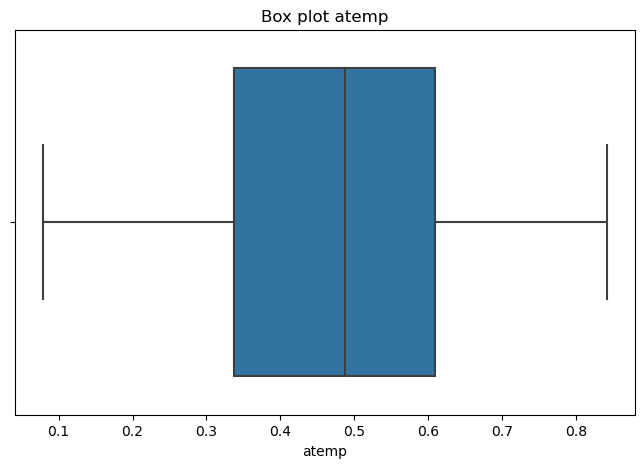

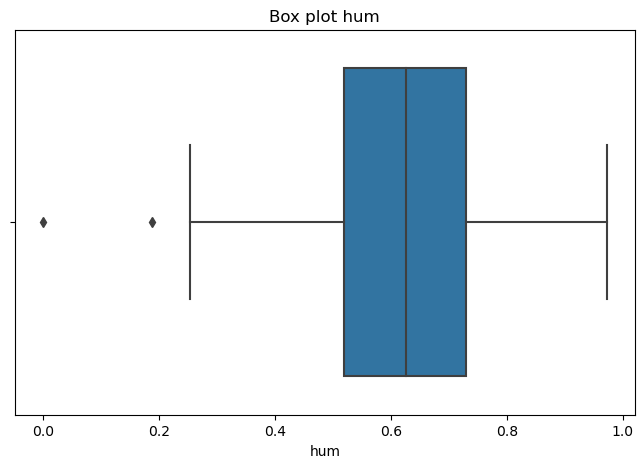

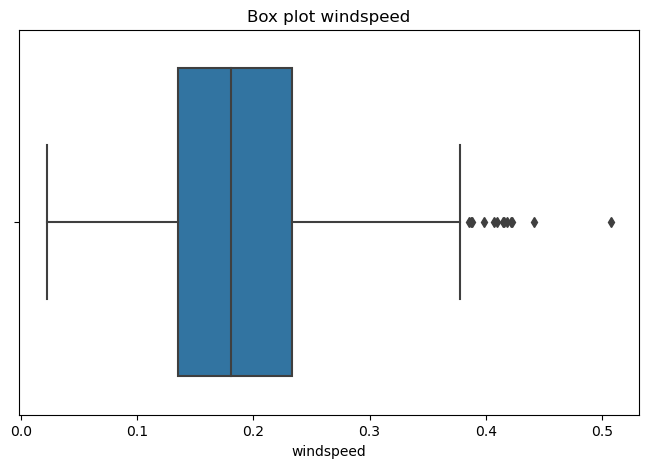

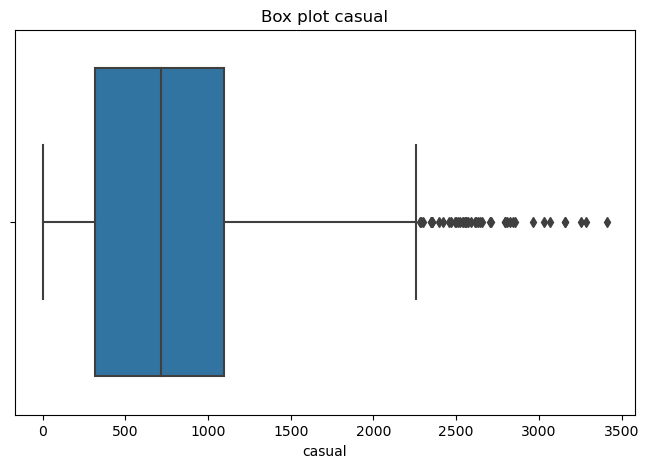

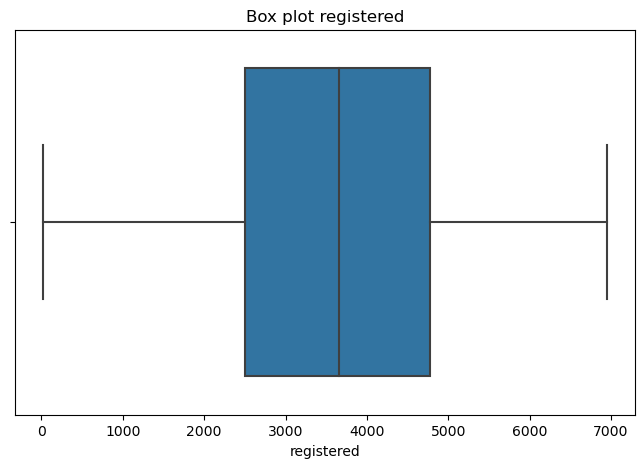

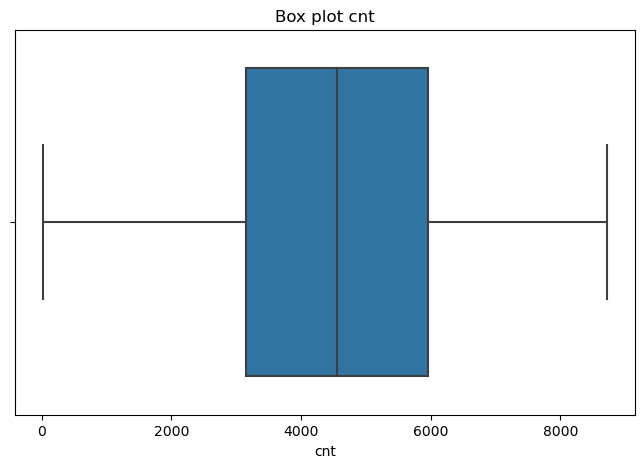

In [124]:
# Box plot untuk mengidentifikasi outlier
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=day_df[col])
    plt.title(f'Box plot {col}')
    plt.show()

In [125]:
# Mengelompokkan data berdasarkan musim untuk mengetahui bagaimana pengaruh musim terhadap jumlah penyewaan.
day_df.groupby(by='season').agg({
    'instant': 'count',
    'cnt': ['max', 'min', 'mean', 'std']
})

instant   cnt                                
         count   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

In [126]:
# Menganalisis bagaimana kondisi cuaca mempengaruhi jumlah penyewaan.
day_df.groupby(by='weathersit').cnt.sum().sort_values(ascending=False)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

In [127]:
# Mengamati jumlah penyewaan berdasarkan hari untuk mengetahui hari mana yang memiliki permintaan tertinggi dan terendah.
day_df.groupby(by='weekday').cnt.sum().sort_values(ascending=False)


weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

# --- EDA untuk hour.csv ---

In [128]:
# Tampilkan info hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [129]:
# Cek nilai yang hilang
print("\nNilai yang hilang pada day.csv:")
print(hour_df.isnull().sum())


Nilai yang hilang pada day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [130]:
# Mengelompokkan jam menjadi beberapa kategori: Morning, Afternoon, dan Night.
hour_df['hour_group'] = hour_df['hr'].apply(lambda x: 'Morning' if 6 <= x < 12 else ('Afternoon' if 12 <= x < 18 else 'Night'))

In [131]:
# Melihat ringkasan statistik untuk data per jam.
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour_group
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8644
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


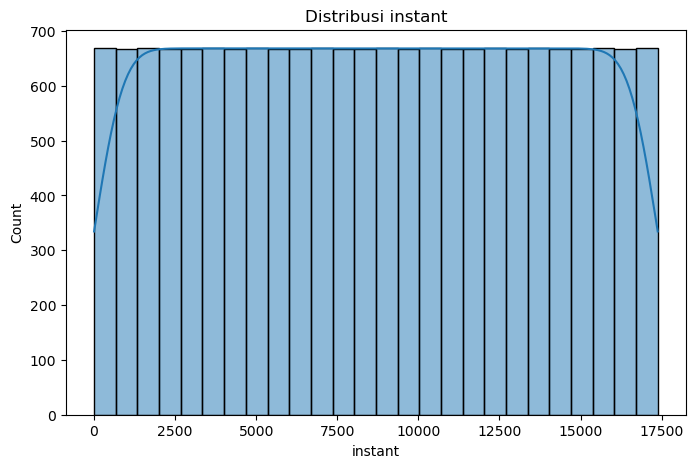

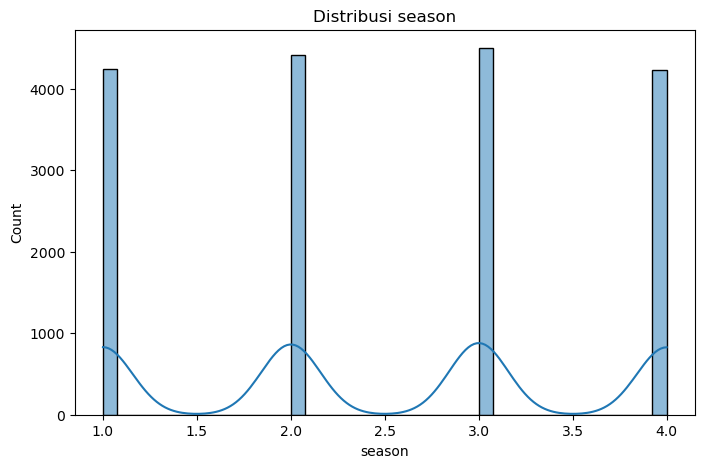

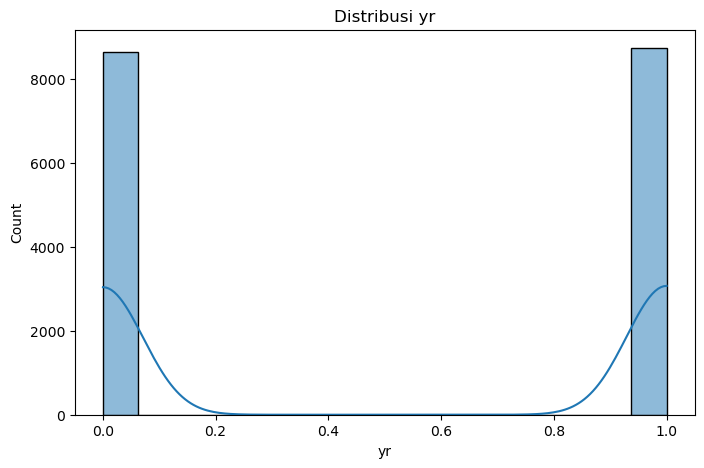

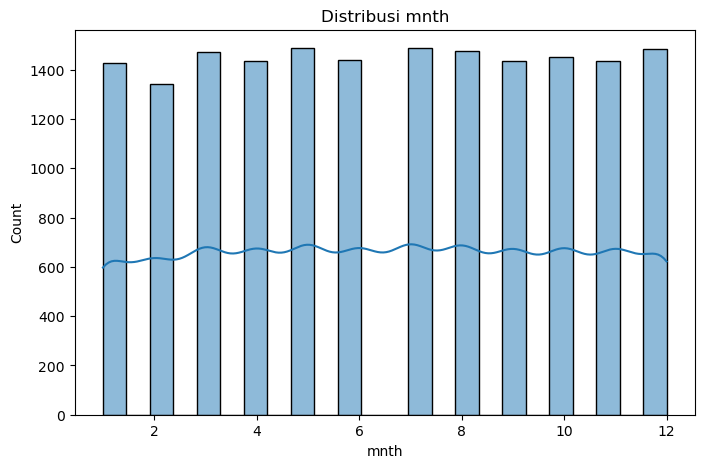

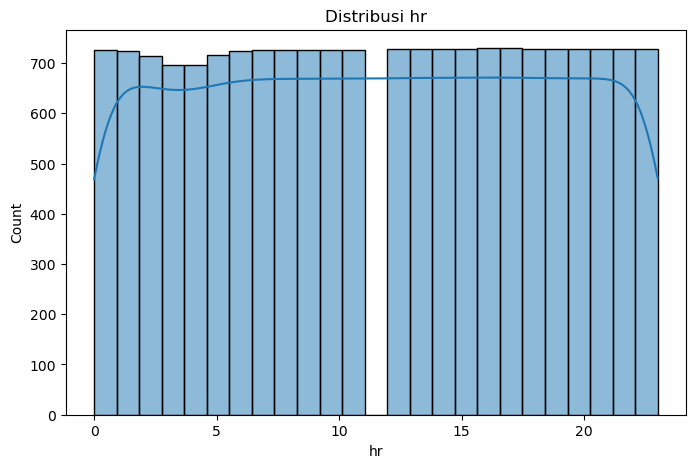

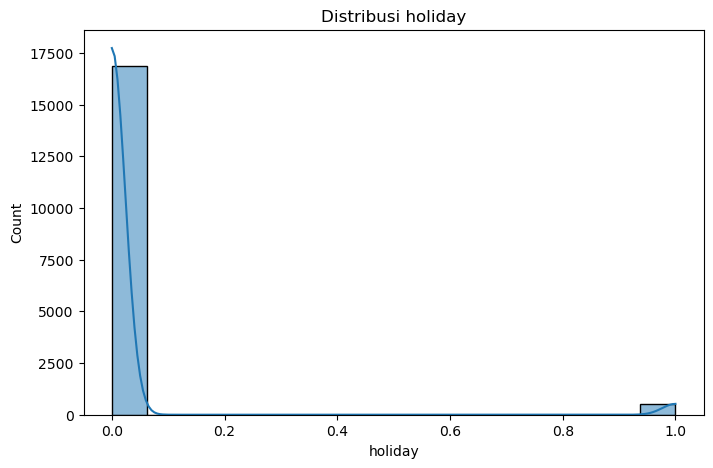

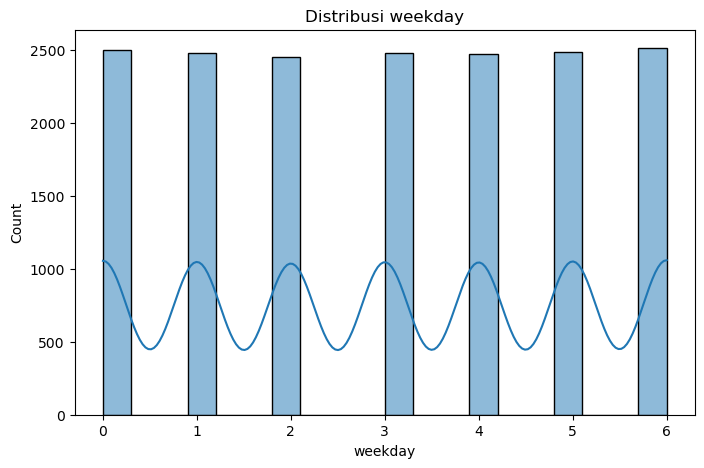

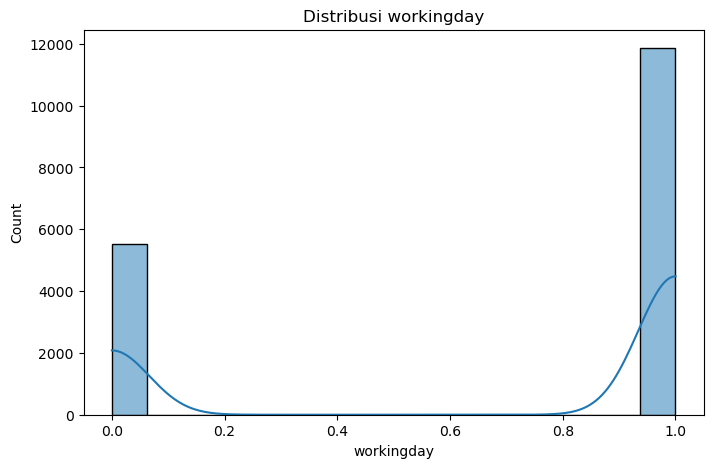

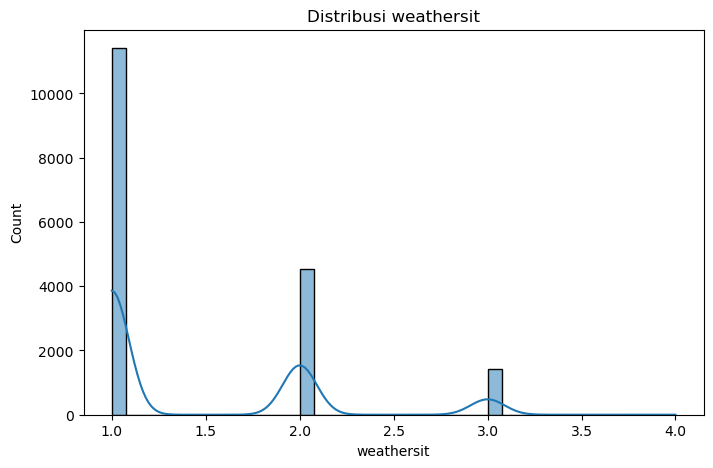

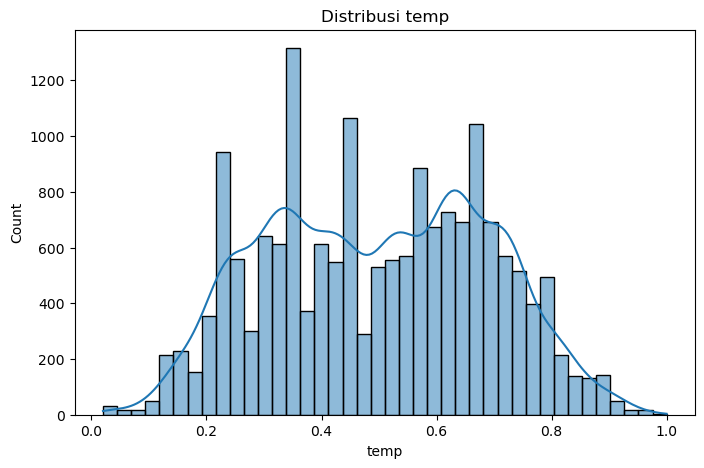

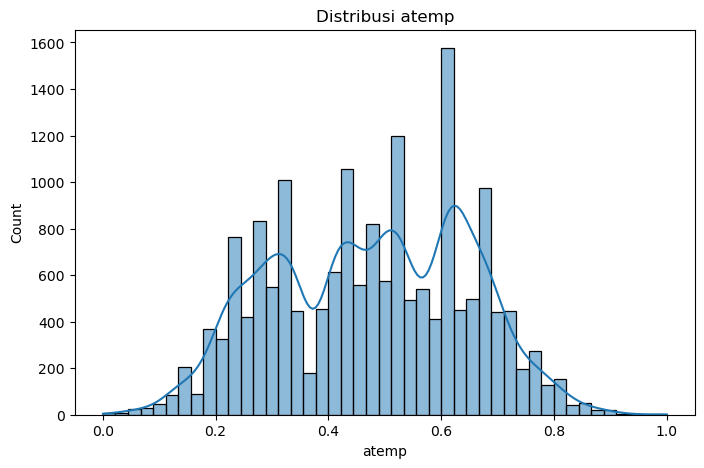

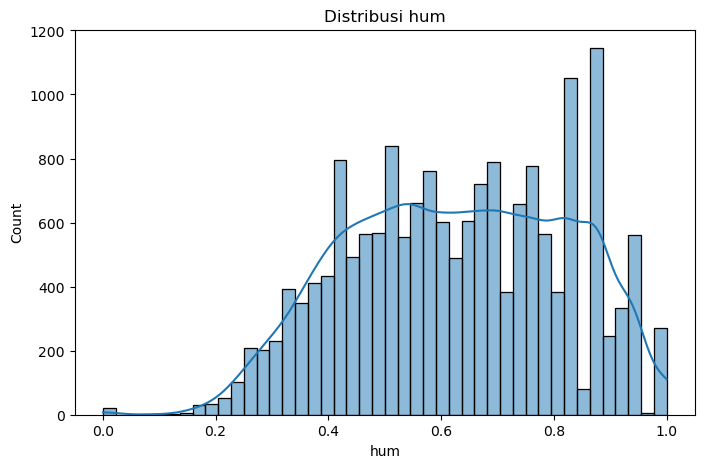

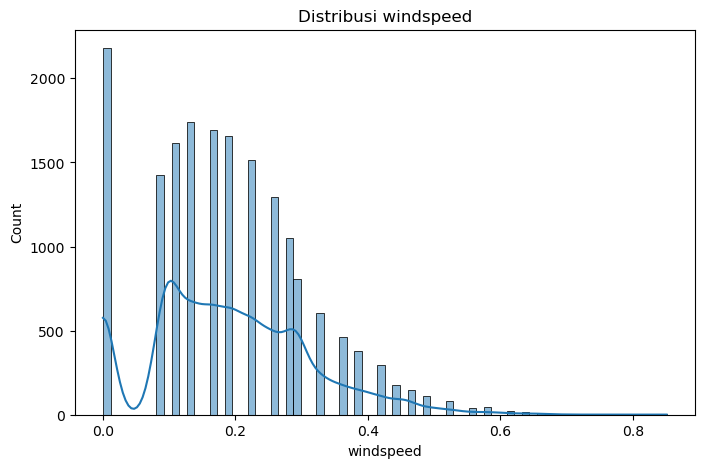

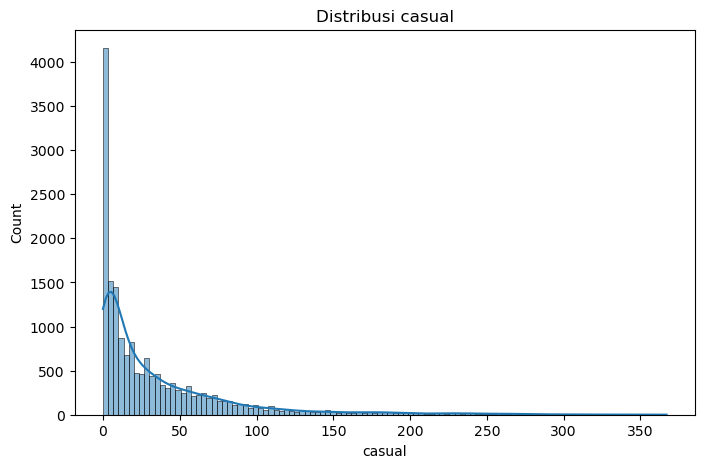

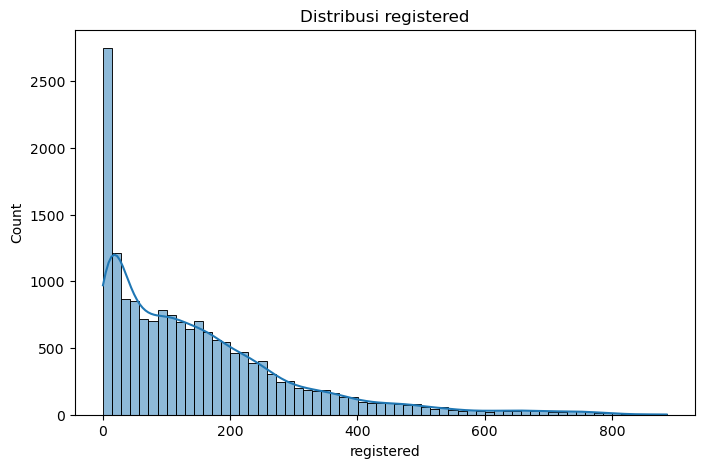

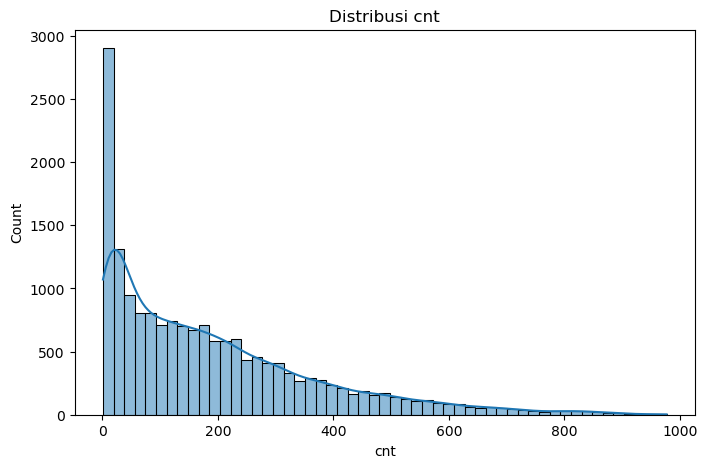

In [132]:
# Plot distribusi untuk hour_df
numerical_columns_hour = hour_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns_hour:
    plt.figure(figsize=(8, 5))
    sns.histplot(hour_df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

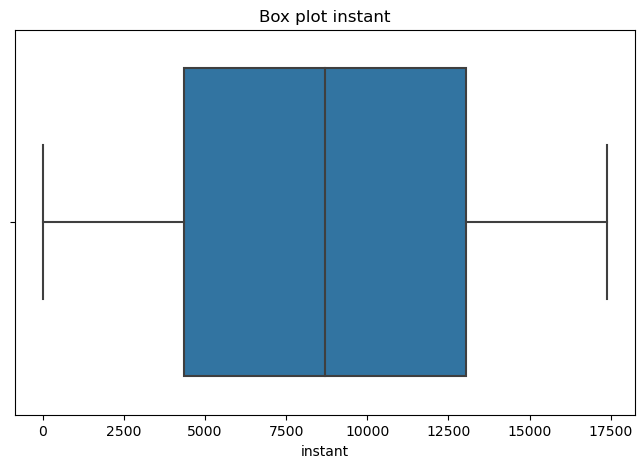

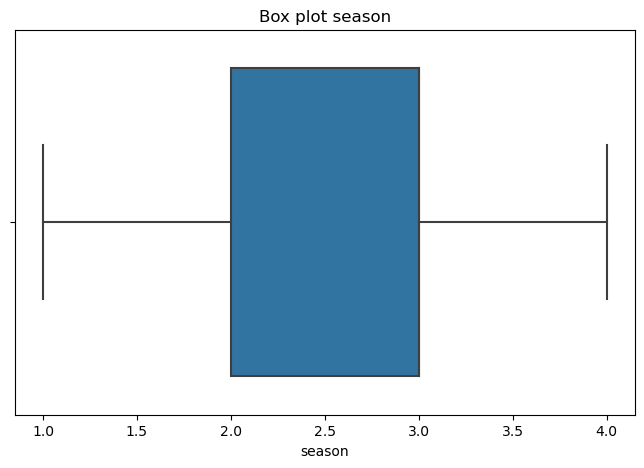

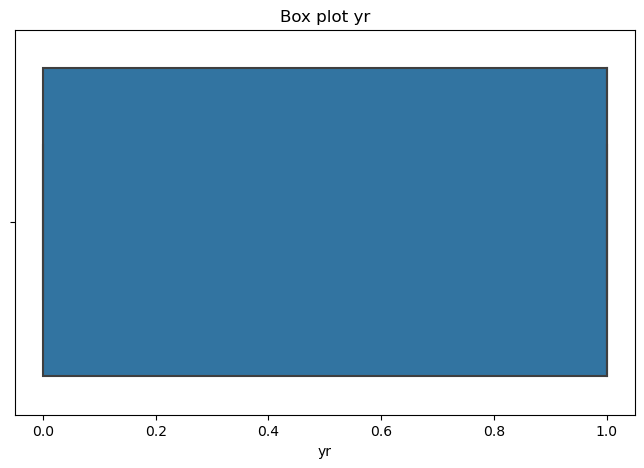

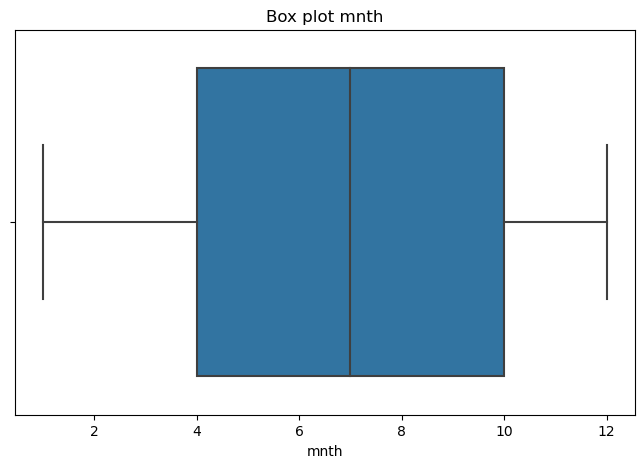

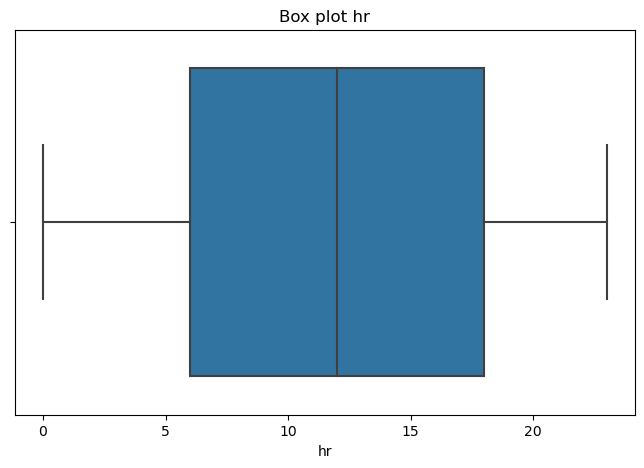

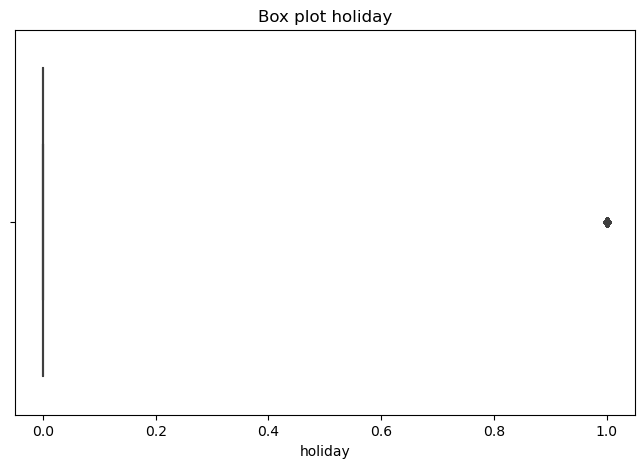

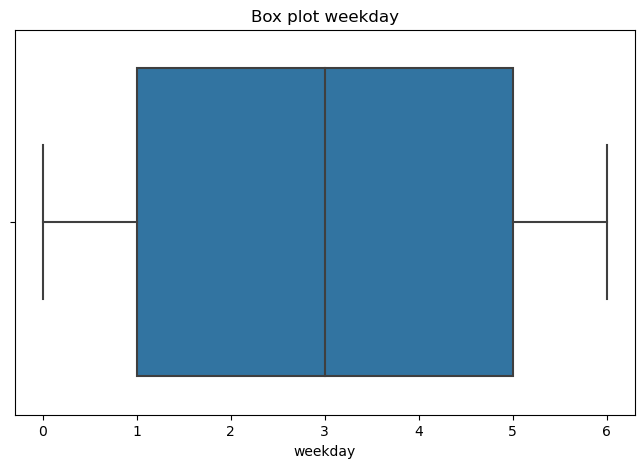

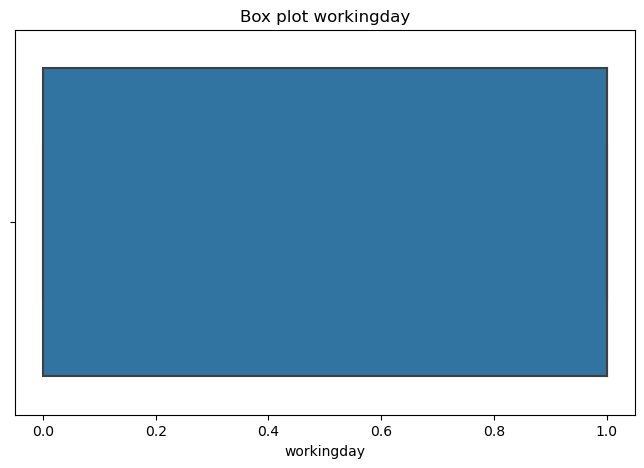

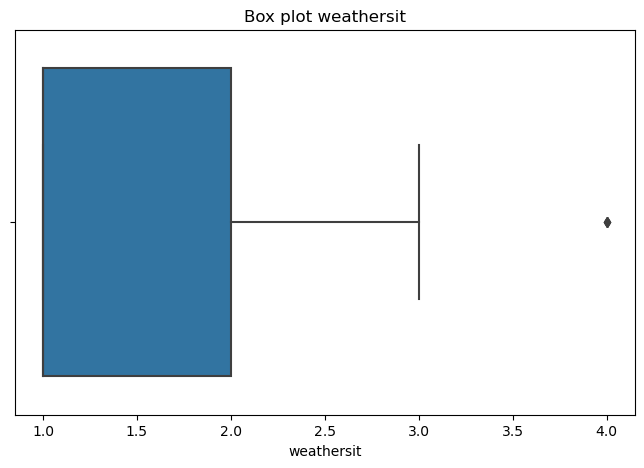

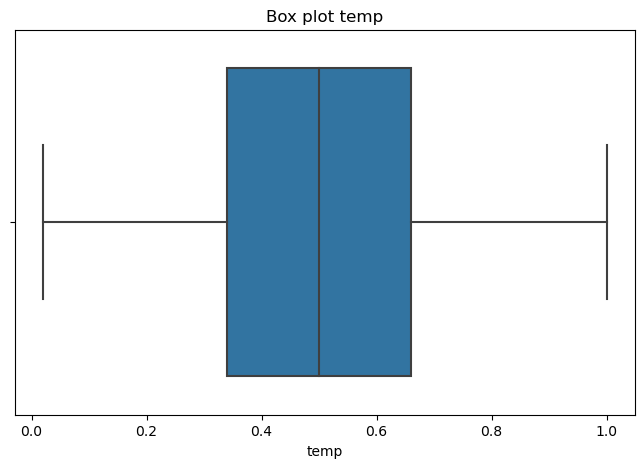

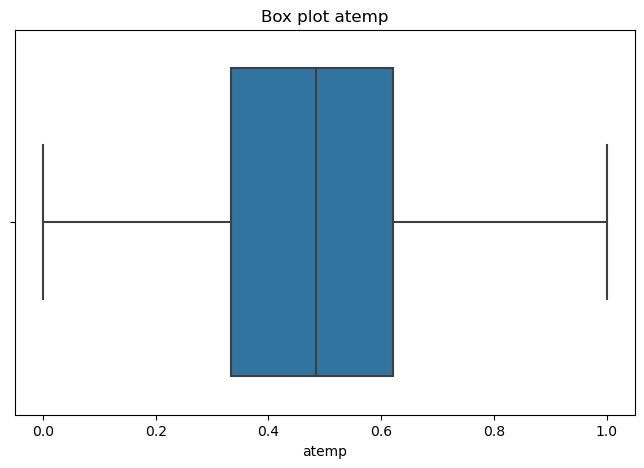

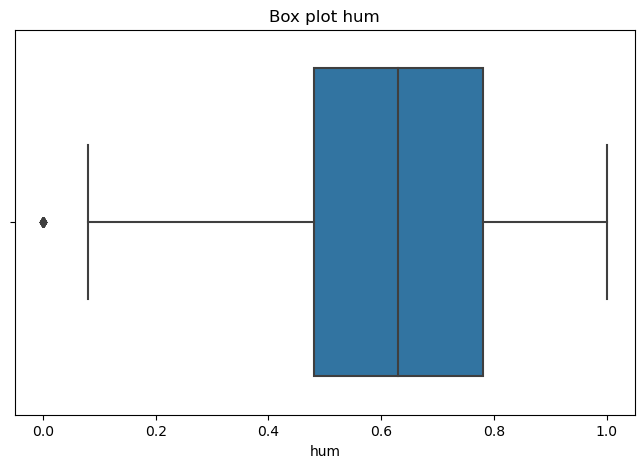

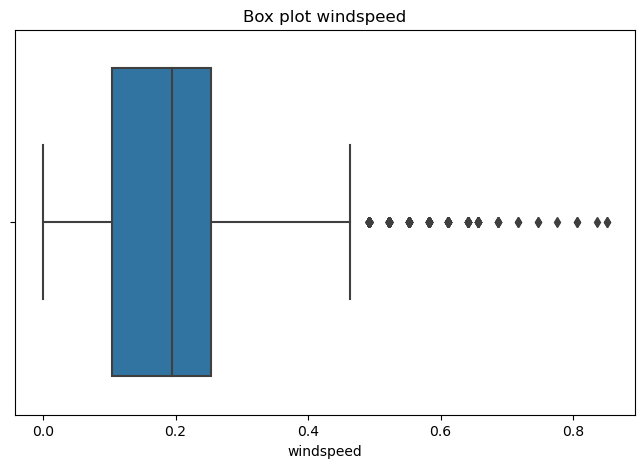

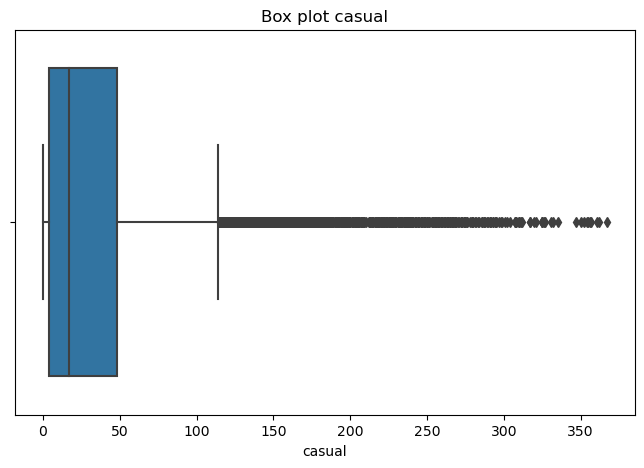

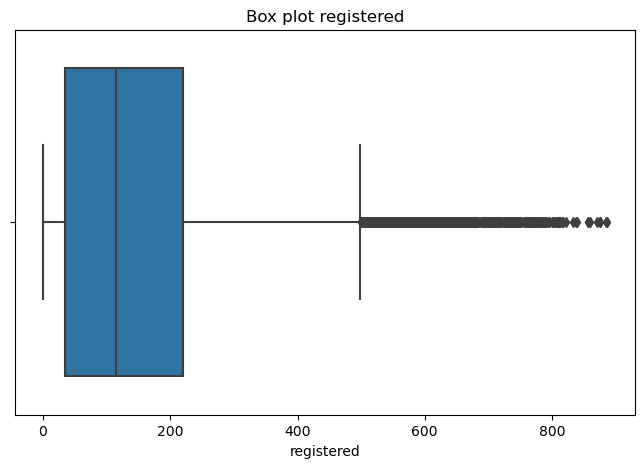

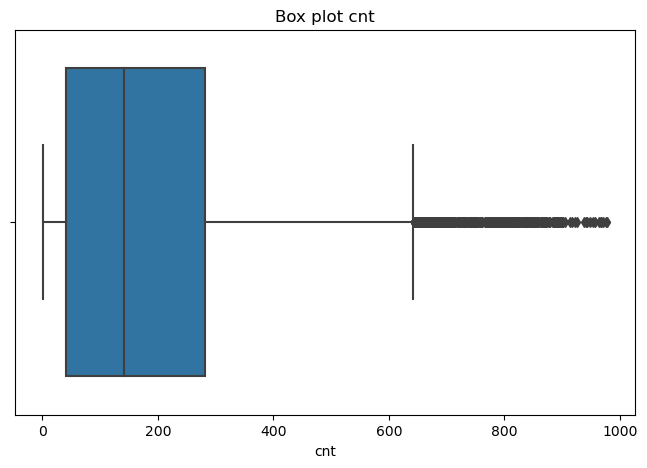

In [133]:
# Box plot untuk mengidentifikasi outlier
for col in numerical_columns_hour:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=hour_df[col])
    plt.title(f'Box plot {col}')
    plt.show()

<Axes: xlabel='hr'>

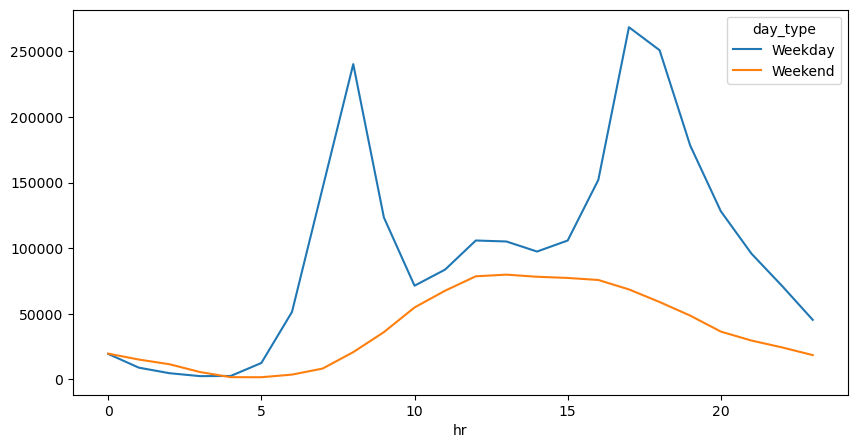

In [134]:
# Menganalisis pola aktivitas untuk memahami kapan jam sibuk dan sepi.
hour_df['day_type'] = hour_df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

hour_df.groupby(['day_type', 'hr']).cnt.sum().unstack().T.plot(kind='line', figsize=(10, 5))

In [135]:
# Menghitung jumlah penyewaan berdasarkan kelompok jam.
hour_df.groupby(by='hour_group').cnt.sum().sort_values(ascending=False)

hour_group
Afternoon    1292742
Night        1092618
Morning       907319
Name: cnt, dtype: int64

In [138]:
# Memeriksa pola penyewaan pada berbagai musim.
hour_df.groupby(by='season').agg({
    'instant': 'count',
    'cnt': ['max', 'min', 'mean', 'std']
})

instant  cnt                            
         count  max min        mean         std
season                                         
1         4242  801   1  111.114569  119.224010
2         4409  957   1  208.344069  188.362473
3         4496  977   1  236.016237  197.711630
4         4232  967   1  198.868856  182.967972

In [136]:
# Menggali hubungan antara kondisi cuaca dan jumlah penyewaan.
hour_df.groupby(by='weathersit').cnt.sum().sort_values(ascending=False)

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

# --- EDA Data all_df ---

In [70]:
# Menggabungkan kedua dataframe untuk analisis lebih lanjut.
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how='left',
    left_on='dteday',
    right_on='dteday'
)

In [74]:
# Preview hasil penggabungan.
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [75]:
# Menghitung korelasi antara variabel dalam day_df dan hour_df untuk menemukan hubungan penting.
correlation = all_df[['cnt_x', 'cnt_y', 'temp_x', 'hum_x', 'windspeed_x']].corr()
print(correlation)


                cnt_x     cnt_y    temp_x     hum_x  windspeed_x
cnt_x        1.000000  0.437289  0.404772 -0.322911     0.093234
cnt_y        0.437289  1.000000  0.592402 -0.067356    -0.145990
temp_x       0.404772  0.592402  1.000000 -0.069881    -0.023125
hum_x       -0.322911 -0.067356 -0.069881  1.000000    -0.290105
windspeed_x  0.093234 -0.145990 -0.023125 -0.290105     1.000000


In [76]:
# Menganalisis interaksi antara musim dan waktu dalam sehari.
all_df.groupby(by=['season_x', 'hour_group']).agg({
    'cnt_x': 'sum',
    'cnt_y': 'sum'
})

cnt_x     cnt_y
season_x hour_group                  
1        Afternoon   190708   2826364
         Morning     135841   2820308
         Night       144799   5532475
2        Afternoon   362858   5511534
         Morning     245804   5511534
         Night       309927  11001003
3        Afternoon   396473   6366774
         Morning     285801   6362440
         Night       378855  12691589
4        Afternoon   342703   5048450
         Morning     239873   5042970
         Night       259037  10075609

In [78]:
# Memahami bagaimana cuaca mempengaruhi pola penyewaan di berbagai waktu.
all_df.groupby(by=['weathersit_x', 'hour_group']).agg({
    'cnt_x': 'sum',
    'cnt_y': 'sum'
})

cnt_x     cnt_y
weathersit_x hour_group                  
1            Afternoon   942284  13917365
             Morning     579067  12834165
             Night       816822  28086484
2            Afternoon   287071   4671898
             Morning     288481   5876487
             Night       220400   8763037
3            Afternoon    63351   1163353
             Morning      39771   1026600
             Night        55209   2447478
4            Afternoon       36       506
             Night          187      3677

In [88]:
# Mengidentifikasi jam sibuk dan sepi berdasarkan hari.
all_df.groupby(by=['weekday_x', 'hour_group']).agg({
    'cnt_x': 'sum',
    'cnt_y': 'sum'
})


cnt_x    cnt_y
weekday_x hour_group                 
0         Afternoon   224661  2664162
          Morning      90477  2658732
          Night       128889  5284350
1         Afternoon   165884  2732886
          Morning     131847  2732886
          Night       157772  5421800
2         Afternoon   161227  2813558
          Morning     141777  2803980
          Night       166105  5584597
3         Afternoon   157838  2838288
          Morning     147965  2838288
          Night       167245  5645582
4         Afternoon   163928  2910646
          Morning     147601  2909784
          Night       173866  5801927
5         Afternoon   185572  2926740
          Morning     146793  2926740
          Night       155425  5837505
6         Afternoon   233632  2866842
          Morning     100859  2866842
          Night       143316  5724915

## Visualization & Explanatory Analysis

# **Pertanyaan 1 :**                                                
Bagaimana pola aktivitas per jam dalam hour.csv berbeda antara hari kerja dan akhir pekan, serta jam berapa saja yang merupakan puncak dan masa sepi dalam periode data terakhir?

In [79]:
# Buat kolom day_of_week dari tanggal (0=Senin, 6=Minggu)
hour_df['day_of_week'] = hour_df['dteday'].dt.dayofweek

In [80]:
# Tentukan apakah hari tersebut weekend (Sabtu: 5, Minggu: 6)
hour_df['is_weekend'] = hour_df['day_of_week'] >= 5

In [81]:
# Group by hr dan tipe hari (weekday/weekend) untuk menghitung rata-rata 'cnt'
hourly_summary = hour_df.groupby(['hr', 'is_weekend'])['cnt'].mean().reset_index()
hourly_summary['day_type'] = np.where(hourly_summary['is_weekend'], 'Weekend', 'Weekday')

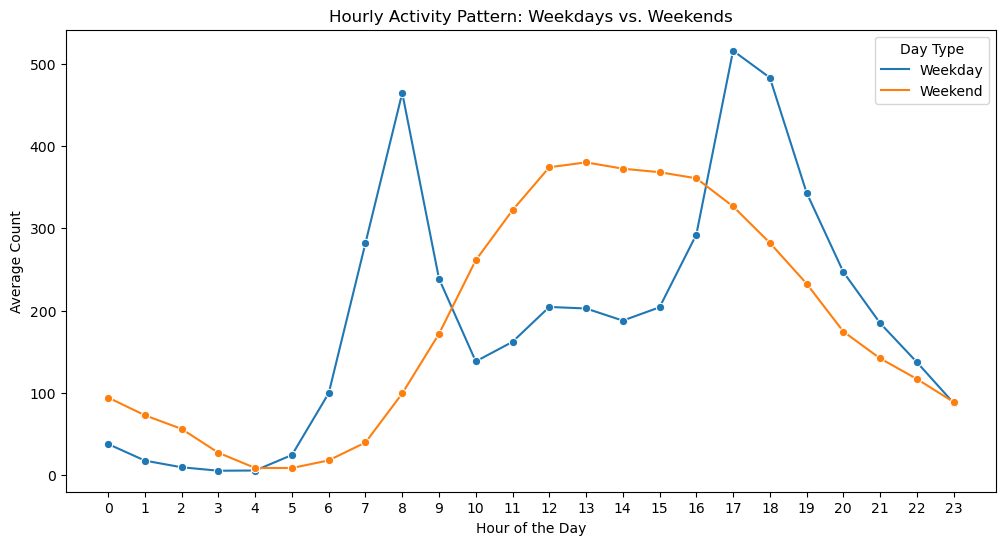

In [82]:
# Visualisasi pola aktivitas per jam untuk hari kerja dan akhir pekan
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_summary, x='hr', y='cnt', hue='day_type', marker='o')
plt.title('Hourly Activity Pattern: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(range(0,24))
plt.legend(title='Day Type')
plt.show()

In [83]:
# Menentukan peak hour dan quiet hour berdasarkan rata-rata keseluruhan
hourly_overall = hour_df.groupby('hr')['cnt'].mean()
peak_hour = hourly_overall.idxmax()
quiet_hour = hourly_overall.idxmin()
print("Peak hour (highest average activity):", peak_hour)
print("Quiet hour (lowest average activity):", quiet_hour)

Peak hour (highest average activity): 17
Quiet hour (lowest average activity): 4


**Insight :**                                                      
Analisis menunjukkan bahwa aktivitas mencapai puncaknya pada jam 17 (5 sore), yang menandakan waktu ideal untuk memaksimalkan layanan, mengoptimalkan sumber daya, dan meluncurkan promosi guna menangani lonjakan permintaan. Sebaliknya, jam 4 pagi merupakan waktu dengan aktivitas paling rendah, sehingga sangat tepat untuk melakukan pemeliharaan sistem atau update tanpa mengganggu pengalaman pelanggan.









#**Pertanyaan 2 :**                                              
Bagaimana hubungan antar variabel dalam day.csv dan hour.csv, dan bagaimana korelasi tersebut dapat memberikan insight untuk perbaikan strategi bisnis?


In [84]:
# --- Analisis Korelasi pada day.csv ---
# Menghitung matriks korelasi untuk day.csv
day_corr = day_df.corr()

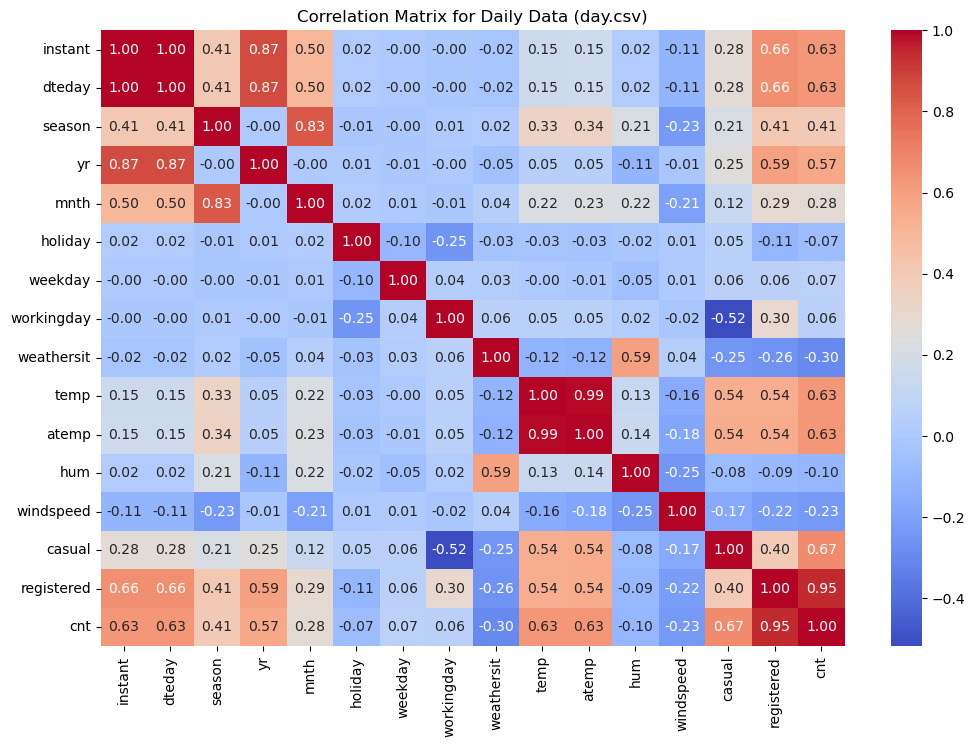

In [85]:
# Visualisasi heatmap korelasi untuk day.csv
plt.figure(figsize=(12, 8))
sns.heatmap(day_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Daily Data (day.csv)")
plt.show()

In [86]:
# Insight: Korelasi antara suhu (temp) dan total count (cnt)
corr_temp_cnt = day_df['temp'].corr(day_df['cnt'])
print("Correlation between temperature and total count in day.csv:", corr_temp_cnt)

Correlation between temperature and total count in day.csv: 0.6274940090334918


In [87]:
# --- Analisis Korelasi pada hour.csv ---
# Menghitung matriks korelasi untuk hour.csv
hour_corr = hour_df.corr()

ValueError: could not convert string to float: 'Night'

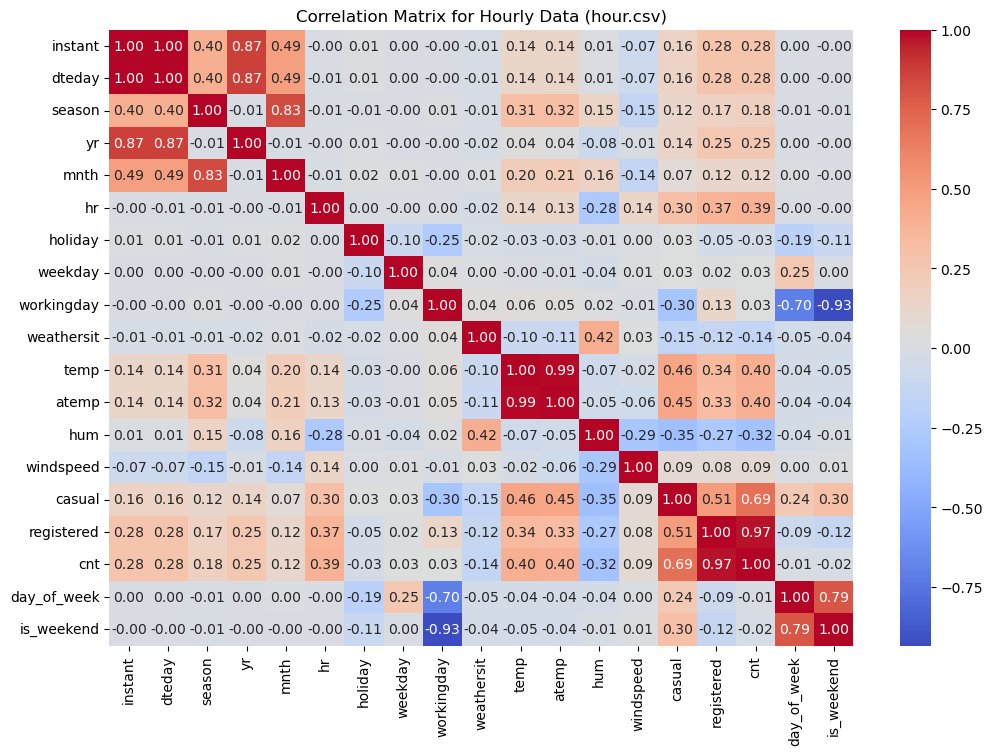

In [ ]:
# Visualisasi heatmap korelasi untuk hour.csv
plt.figure(figsize=(12, 8))
sns.heatmap(hour_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Hourly Data (hour.csv)")
plt.show()

In [ ]:
# Insight: Korelasi antara jam (hr) dan total count (cnt)
corr_hr_cnt = hour_df['hr'].corr(hour_df['cnt'])
print("Correlation between hour and total count in hour.csv:", corr_hr_cnt)

Correlation between hour and total count in hour.csv: 0.39407149778294326


## Conclusion

**Conclution pertanyaan 1 :**                                          
Analisis data dari hour.csv menunjukkan bahwa pola aktivitas per jam berbeda antara hari kerja dan akhir pekan. Secara keseluruhan, aktivitas mencapai puncaknya pada jam 17 (5 sore) dan paling sepi pada jam 4 pagi. Temuan ini menyarankan agar operasional, penjadwalan, dan alokasi sumber daya bisnis disesuaikan dengan periode puncak dan masa sepi untuk mengoptimalkan layanan dan efisiensi.

----------------------

**Conclution pertanyaan 2 :**                                       
Analisis korelasi antar variabel dalam day.csv dan hour.csv mengungkap hubungan signifikan antara faktor-faktor seperti suhu, kondisi cuaca, dan total aktivitas. Misalnya, korelasi yang kuat antara temperatur dan jumlah aktivitas menandakan bahwa kondisi cuaca sangat memengaruhi perilaku pengguna. Insight ini dapat digunakan untuk menyusun strategi bisnis yang lebih efektif, seperti penyesuaian operasional dan perencanaan promosi yang responsif terhadap perubahan lingkungan.